### Step I: Import Libraries for Data Visualization

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 15,6

### Step II: Load The Titanic DataSet

In [100]:
data = pd.read_csv('train.csv')

# Convert the survived column to strings for easier reading
data['Survived'] = data['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

# Convert the Embarked column to strings for easier reading
data['Embarked'] = data['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


### Step III: Start The Visualization
First We Look at how many passengers Lived or Dies in each Passenger Class

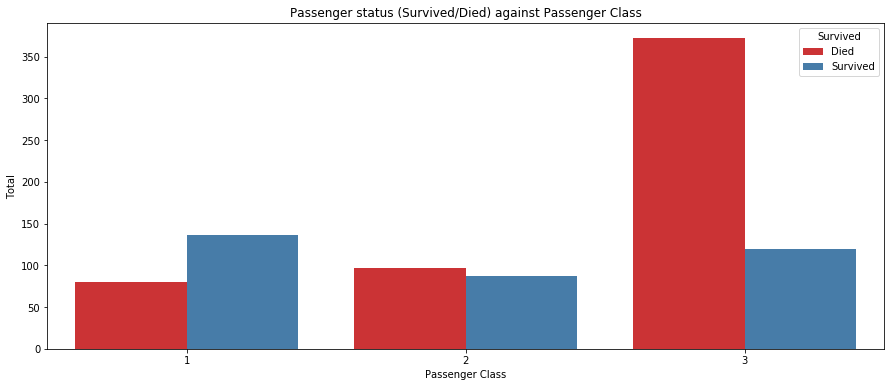

In [33]:
# fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

#### Visualization II: We look how many people lived or survived according to their Sex

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


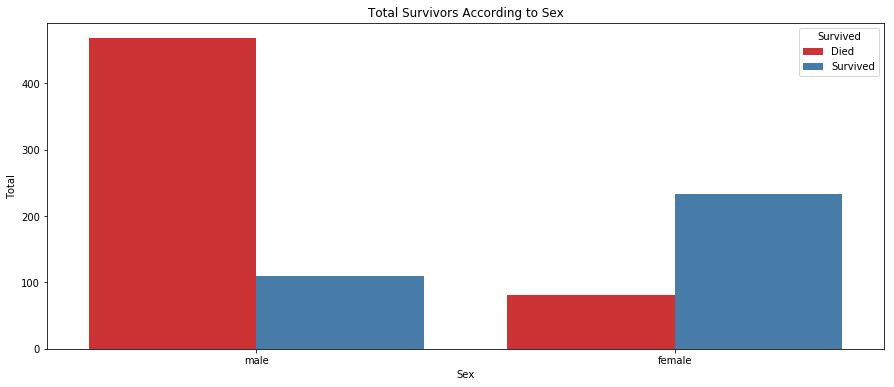

In [13]:
print(pd.crosstab(data["Sex"],data.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

#### Visualization III: Next we look at Survivors with regards to Age groups

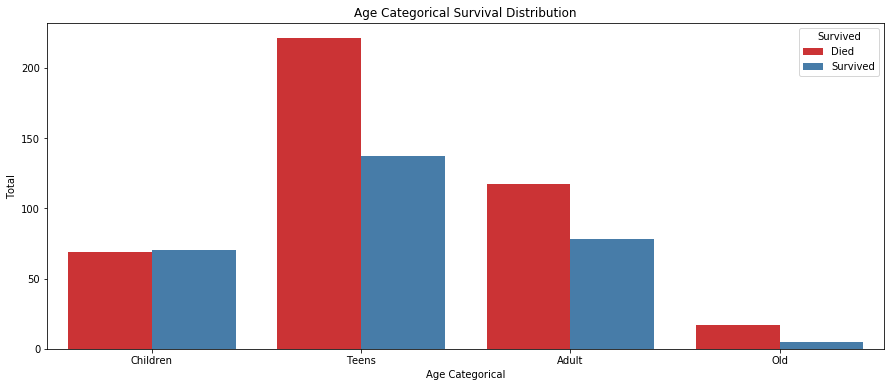

In [54]:
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
data['Age_cats'] = pd.cut(data.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = data, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

#### Visualiztion IV: We get get to see the survival distribution based on where passengers embarked from

Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       217


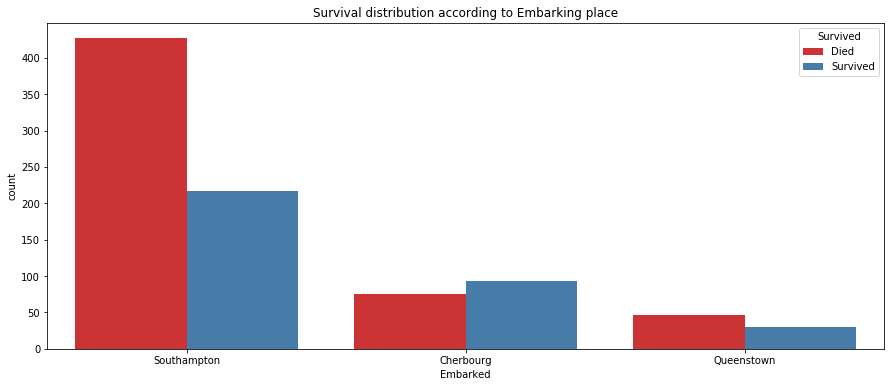

In [61]:
print(pd.crosstab(data['Embarked'], data.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [141]:
print(data.nunique())
data.head()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


### Proprocessing: Drop Unwanted Features

In [101]:
data.drop(['Name','Ticket','Cabin','PassengerId'], 1, inplace =True)
data.fillna(0, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Died,3,male,22.0,1,0,7.2500,Southampton
1,Survived,1,female,38.0,1,0,71.2833,Cherbourg
2,Survived,3,female,26.0,0,0,7.9250,Southampton
3,Survived,1,female,35.0,1,0,53.1000,Southampton
4,Died,3,male,35.0,0,0,8.0500,Southampton


In [102]:
data.Sex.replace(('male','female'), (0,1), inplace = True)
data.Embarked.replace(('Southampton','Cherbourg','Queenstown'), (0,1,2), inplace = True)
data.Survived.replace(('Died','Survived'), (0,1), inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Lets see the Correlation between the features

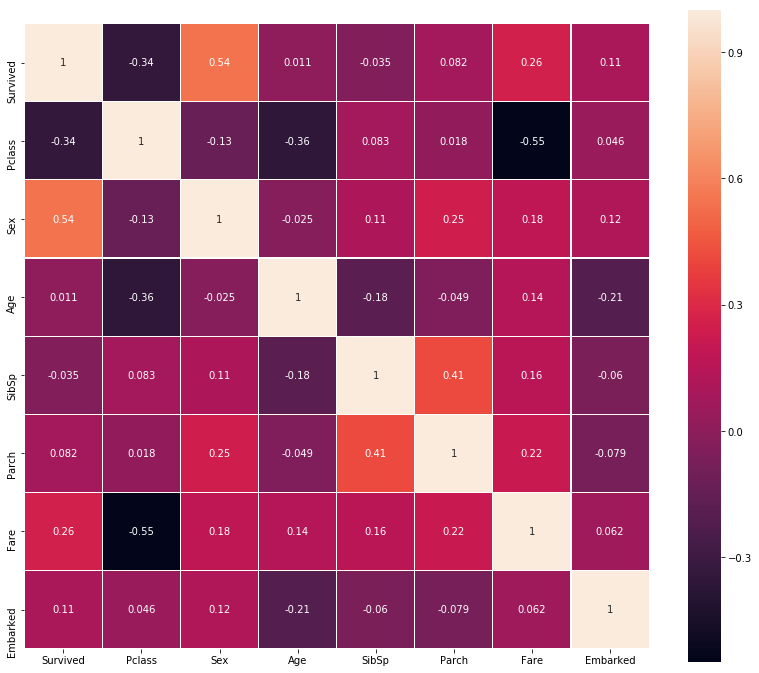

In [103]:
plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [104]:

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Prepare X (Features) & y (Labels) for the classifier

In [105]:
X = np.array(data.drop(['Survived'],1))
y = np.array(data['Survived'])
print("Features shape: ", X.shape)
print("Labels: ", y.shape)

Features shape:  (891, 7)
Labels:  (891,)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Import Machine Learning Libraries

In [107]:
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [108]:
Scaler = MinMaxScaler(feature_range = (0,1))
# Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [109]:
Scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [110]:
clf = KMeans(n_clusters  = 2)
clf.fit(X_train, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
res = clf.predict(X_test)

In [112]:
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
predictions = tr.predict(X_test)

In [122]:
kfold = KFold(n_splits=3, random_state=0)
model = tr
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: ", (results.mean()*100.0, results.std()*100.0)) 

Accuracy:  (77.777777777777771, 2.0755602703599241)


In [124]:
tr.score(X_test, y_test)*100

76.119402985074629

In [125]:
SV = svm.SVC(kernel = 'linear', decision_function_shape = 'ovo')
SV

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
SV.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
SV.score(X_test, y_test)

0.80597014925373134

In [32]:
# KNeighborsClassifier()

### Lets train our data on K-Nearest Neighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
print("Testing Accuracy (%): ",knn.score(X_test, y_test)*100.0)

Testing Accuracy (%):  82.4626865672


### Lets train on Logistic Regression (It performs much better that the rest)

In [133]:
LR = LogisticRegression(C = 100.0, penalty = 'l2')

In [161]:
LR.fit(X_train, y_train)
print("Accuracy score on Test Data (%): ", LR.score(X_test, y_test)*100.0)

Accuracy score on Test Data (%):  83.2089552239


In [165]:
# Cross Validation Scores
kfold = KFold(n_splits=5, random_state=0)
model = LR
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy score on Training Data (%): ", (results.mean()*100.0)) 

Accuracy score on Training Data (%):  77.1987096774
